In [30]:
import pandas as pd
import numpy as np
from sklearn.svm import SVC
from sklearn.model_selection import learning_curve
from sklearn import tree, metrics
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.metrics import make_scorer, accuracy_score, confusion_matrix, classification_report, roc_auc_score
from sklearn.model_selection import  cross_val_score, cross_validate
from sklearn import model_selection
from sklearn.model_selection import GridSearchCV
from time import time
from operator import itemgetter
from sklearn.model_selection import validation_curve
import datetime

import sklearn.preprocessing as preprocessing
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit

#import graphviz 
import timeit
import os
from IPython.display import Image

In [2]:
columns = ['age', 'workclass', 'fnlwgt', 'education', 'educationalnum','marital-status', 'occupation', 'relationship', 'race', 'gender','capitalgain', 'capitalloss', 'hoursperweek', 'nativecountry','income']

train = pd.read_csv('adult.csv', header=None, names = columns)
test = pd.read_csv('adult_test.csv',  header=None, names = columns)

adult = pd.concat([train,test])

len(adult)

48842

In [3]:
adult.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'educationalnum',
       'marital-status', 'occupation', 'relationship', 'race', 'gender',
       'capitalgain', 'capitalloss', 'hoursperweek', 'nativecountry',
       'income'],
      dtype='object')

In [4]:
adult['nativecountry'].unique()

array([' United-States', ' Cuba', ' Jamaica', ' India', ' ?', ' Mexico',
       ' South', ' Puerto-Rico', ' Honduras', ' England', ' Canada',
       ' Germany', ' Iran', ' Philippines', ' Italy', ' Poland',
       ' Columbia', ' Cambodia', ' Thailand', ' Ecuador', ' Laos',
       ' Taiwan', ' Haiti', ' Portugal', ' Dominican-Republic',
       ' El-Salvador', ' France', ' Guatemala', ' China', ' Japan',
       ' Yugoslavia', ' Peru', ' Outlying-US(Guam-USVI-etc)', ' Scotland',
       ' Trinadad&Tobago', ' Greece', ' Nicaragua', ' Vietnam', ' Hong',
       ' Ireland', ' Hungary', ' Holand-Netherlands'], dtype=object)

In [5]:
print("Before dropping size = " , len(adult))

adult = adult[adult.occupation.str.strip() != '?']
adult = adult[adult.workclass.str.strip() != '?']
adult = adult[adult.nativecountry.str.strip() != '?']

print("After removing rows with value ?" , len(adult))


Before dropping size =  48842
After removing rows with value ? 45222


In [6]:
def func(x):
    if(x == " <=50K" or x == " <=50K."):
        return 0
    elif(x == " >50K" or x == ' >50K.'):
        return 1
adult['income'] = adult['income'].apply(func)

y = adult['income']
del adult['income']

In [7]:
adult.head()

,age,workclass,fnlwgt,education,educationalnum,marital-status,occupation,relationship,race,gender,capitalgain,capitalloss,hoursperweek,nativecountry
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba


#### Education and educationnum both represent the level of education. So we can remove one of them.
#### fnlwgt – The number of people the census takers believe that observation represents. Remove this variable.

In [8]:
del adult['education']
del adult['fnlwgt']

In [9]:
adult.head()

,age,workclass,educationalnum,marital-status,occupation,relationship,race,gender,capitalgain,capitalloss,hoursperweek,nativecountry
0,39,State-gov,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States
1,50,Self-emp-not-inc,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States
2,38,Private,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States
3,53,Private,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States
4,28,Private,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba


In [10]:
adult = pd.get_dummies(adult, columns=['workclass','marital-status','occupation',
                                         'relationship','race',
                                         'gender','nativecountry'])

In [11]:
adult.shape

(45222, 87)

In [12]:

# Train - Test split# Train  
X_train, X_test, y_train, y_test = train_test_split(adult, y, test_size  = 0.3)

print("Training dataset size: ", len(X_train))
print("Testing dataset size: ", len(X_test))
print("Training label dataset size: ", len(y_train))
print("Testing label dataset size: ", len(y_test))

Training dataset size:  31655
Testing dataset size:  13567
Training label dataset size:  31655
Testing label dataset size:  13567


In [13]:
X_train.head()

,age,educationalnum,capitalgain,capitalloss,hoursperweek,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Private,workclass_ Self-emp-inc,workclass_ Self-emp-not-inc,...,nativecountry_ Portugal,nativecountry_ Puerto-Rico,nativecountry_ Scotland,nativecountry_ South,nativecountry_ Taiwan,nativecountry_ Thailand,nativecountry_ Trinadad&Tobago,nativecountry_ United-States,nativecountry_ Vietnam,nativecountry_ Yugoslavia
30798,36,10,0,0,37,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
9194,62,14,0,0,55,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
9940,33,13,0,0,40,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
1907,26,14,0,0,50,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
1671,43,10,0,0,50,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0


In [14]:
#min_max_scaler = preprocessing.MinMaxScaler()
#X_train = min_max_scaler.fit_transform(X_train)
X_train = preprocessing.scale(X_train)
X_test = preprocessing.scale(X_test)

### Check for hyper paramters using C and kernel

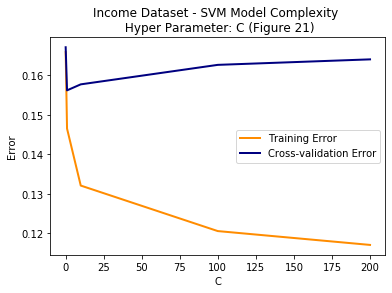

train_scores = [0.8341889  0.85351446 0.86791977 0.87942664 0.8829253 ]
test_scores = [0.83294884 0.8438477  0.8423315  0.8374034  0.83601342]
Optimal C =  1  Minimum Error =   0.1561522980799156


In [15]:
param_range = [0.1, 1, 10, 100, 200]
classifier = SVC()

train_scores, test_scores = validation_curve( classifier, X_train, y_train, param_name="C", param_range=param_range,
    cv=5, scoring=make_scorer(accuracy_score), n_jobs=5)
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.title("Income Dataset - SVM Model Complexity \n Hyper Parameter: C (Figure 21)")
plt.xlabel("C")
plt.ylabel("Error")


lw = 2
plt.plot(param_range, 1 - train_mean, label="Training Error",
             color="darkorange", lw=lw)
plt.plot(param_range, 1 - test_mean, label="Cross-validation Error",
             color="navy", lw=lw)
plt.legend(loc="best")
plt.show()

print("train_scores =", train_mean)
print("test_scores =", test_mean)
print("Optimal C = ",  param_range[np.ndarray.argmax(test_mean)], " Minimum Error =  " , (1 - np.amax(test_mean))  )



### Choose best hyperparameters using different kernels and C - cv error


In [20]:
np.random.seed(55)
param_kernel = ["rbf", "linear", "poly", "sigmoid"]
classifier = SVC()


i=0
cv_scores=[]
train_scores=[]
    
for kernel_p in param_kernel:
    classifier = SVC(kernel = kernel_p)
    scores = cross_validate(classifier, X_train, y_train, cv = 5, scoring = make_scorer(accuracy_score), return_train_score = True)

    cv_scores.append(np.mean(scores['test_score']))
    train_scores.append(np.mean(scores['train_score']))
    i = i+1

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarni

In [21]:
print(cv_scores)

[0.8438477019200844, 0.8458062783212009, 0.8268203808630694, 0.8115622624051143]


In [18]:

cv_scores_np = np.array(cv_scores)
print(type(cv_scores_np))

cv_scores_np = 1-cv_scores_np
print(cv_scores_np)


<class 'numpy.ndarray'>
[0.1561523]


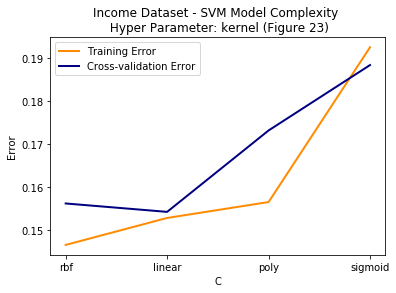

train_scores = [0.8535144594625337, 0.84722791662664, 0.8435160318129867, 0.8074079898025367]
test_scores = [0.8438477019200844, 0.8458062783212009, 0.8268203808630694, 0.8115622624051143]
Optimal C =  linear  Minimum Error =   0.15419372167879908


In [22]:
cv_scores_np = np.array(cv_scores)
train_scores_np = np.array(train_scores)


plt.title("Income Dataset - SVM Model Complexity \n Hyper Parameter: kernel (Figure 23)")
plt.xlabel("C")
plt.ylabel("Error")


lw = 2
plt.plot(param_kernel, 1 - train_scores_np, label="Training Error",
             color="darkorange", lw=lw)
plt.plot(param_kernel, 1 - cv_scores_np, label="Cross-validation Error",
             color="navy", lw=lw)
plt.legend(loc="best")
plt.show()

print("train_scores =", train_scores)
print("test_scores =", cv_scores)
print("Optimal C = ",  param_kernel[np.ndarray.argmax(cv_scores_np)], " Minimum Error =  " , (1 - np.amax(cv_scores_np))  )



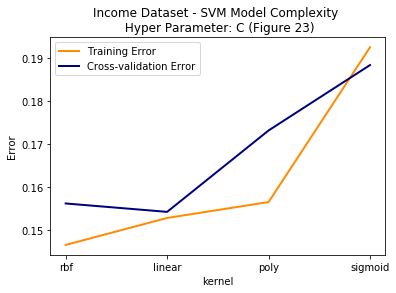

In [29]:
train_scores = [0.8535144594625337, 0.84722791662664, 0.8435160318129867, 0.8074079898025367]
test_scores = [0.8438477019200844, 0.8458062783212009, 0.8268203808630694, 0.8115622624051143]

train_mean = np.array(train_scores)
test_mean = np.array(test_scores)

plt.title("Income Dataset - SVM Model Complexity \n Hyper Parameter: C (Figure 23)")
plt.xlabel("kernel")
plt.ylabel("Error")


lw = 2
plt.plot(param_kernel, 1 - train_mean, label="Training Error",
             color="darkorange", lw=lw)
plt.plot(param_kernel, 1 - test_mean, label="Cross-validation Error",
             color="navy", lw=lw)
plt.legend(loc="best")
plt.show()


### Create learning curve - Sample data set size vs. Error

In [ ]:
train_scores = [0.8535144594625337, 0.84722791662664, 0.8435160318129867, 0.8074079898025367]
test_scores = [0.8438477019200844, 0.8458062783212009, 0.8268203808630694, 0.8115622624051143]



train_scores = [0.85631912 0.85687204 0.85184308 0.85165367 0.84966432 0.8500362
 0.8487194  0.84872149 0.8470645  0.84725348]
test_scores = [0.8432158  0.84381606 0.84447956 0.84473223 0.84514282 0.84530082
 0.84549029 0.84586941 0.84590101 0.84580628]
train sizes = [ 2532  5064  7596 10129 12661 15193 17726 20258 22790 25323]


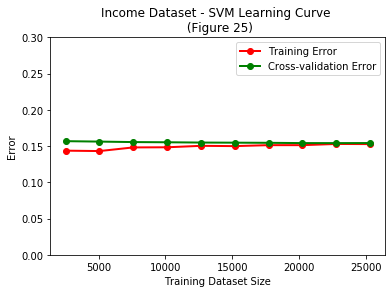

In [23]:
np.random.seed(55)
classifier = SVC(kernel = "linear", C = 1)
classifier.fit(X_train, y_train)

title = "Income Dataset - SVM Learning Curve \n (Figure 25)"
ylim=(0.0, 0.3)
# Cross validation with 100 iterations to get smoother mean test and train
# score curves, each time with 20% data randomly selected as a validation set.
#cv = ShuffleSplit(n_splits=100, test_size=0.3, random_state=0)
#cv = StratifiedKFold(y_train, n_folds=10)
#plot_learning_curve(estimator, title, X_train, y_train, , cv=cv, n_jobs=4)



plt.title(title)
if ylim is not None:
    plt.ylim(*ylim)
plt.xlabel("Training Dataset Size")
plt.ylabel("Error")
train_sizes, train_scores, test_scores = learning_curve(
    classifier, X_train, y_train, cv=5, n_jobs=4, train_sizes=np.linspace(.1, 1.0, 10))



train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)
#test_scores_mean1 = np.mean(test_scores1, axis=1)

print("")
    
lw = 2
plt.plot(train_sizes, 1 - train_scores_mean, 'o-', color="r",
             label="Training Error",  lw=lw)
plt.plot(train_sizes, (1- test_scores_mean), 'o-', color="g",
             label="Cross-validation Error",  lw=lw)

plt.legend(loc="best")
print("train_scores =", train_scores_mean)
print("test_scores =", test_scores_mean)
print("train sizes =", train_sizes)

plt.show()




### Predict on Testing set

In [31]:
st_train_time = timeit.default_timer() 
classifier.fit(X_train, y_train)
end_train_time = timeit.default_timer()


st_pred_time = timeit.default_timer() 
y_pred = classifier.predict(X_test)
end_pred_time = timeit.default_timer() 

pred_time = end_pred_time - st_pred_time

print("Accuracy: %s%%" % (100*accuracy_score(y_test, y_pred)))
print(confusion_matrix(y_test, y_pred))

print(classification_report(y_test, y_pred, target_names=['y', 'n']))
print("AUC =", roc_auc_score(y_test, y_pred))
print("Prediction Time = ", pred_time)
print("Training Time = ", end_train_time - st_train_time)
#Create timings for Cross-validation set


Accuracy: 85.1256725878971%
[[9478  707]
 [1311 2071]]
              precision    recall  f1-score   support

           y       0.88      0.93      0.90     10185
           n       0.75      0.61      0.67      3382

    accuracy                           0.85     13567
   macro avg       0.81      0.77      0.79     13567
weighted avg       0.85      0.85      0.85     13567

AUC = 0.7714718715008302
Prediction Time =  28.918264500000078
Training Time =  207.62248460000046


In [ ]:
estimator.n_features_